# Title

_Brief and informative, gives some idea of your core question or topic area. This block should also include team name, all student names, and the date of the submission._

## Introduction

- One or two paragraphs providing an overview of the data set and the purpose of the report. Where did the data come from and what does it show? What questions are you trying to answer?
- One paragraph discussing the stakeholders in your data analysis and your ethical concerns or responsibilities using the data and in your analysis. Everyone has ethical considerations, no matter what the dataset or subject matter!

## Data Exploration

- Provide some details describing the data you are working with. What are the observations? The key variables you will be looking at? Are there any particular challenges in the data you will need to work through or be aware of during analysis?
- Include 3-5 summaries/visualizations of your data, with brief explanations of each one. 

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('GlassDoorMeta.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'GlassDoorMeta.csv'

In [ ]:
# Exclude rows marked as both "data analytics" and "data science" advertisements
filtered_df = df[~((df['data_science'] == 1) & (df['data_analytics'] == 1))]

# Display the first few rows of the filtered dataframe to confirm the exclusion
filtered_df.head()

,Unnamed: 0,id,url,company,job_title,duplicates,first_date_scraped,latest_date_scraped,data_science,data_analytics
2,2,1876,/partner/jobListing.htm?pos=206&ao=1110586&s=5...,FrankCrum Staffing,Data Analytics Specialist,258,09-04-2022,09-12-2022,0,1
4,4,976,/partner/jobListing.htm?pos=206&ao=1110586&s=5...,John Deere,Data Science & Analytics Development Program 2...,214,09-03-2022,09-12-2022,1,0
6,6,979,/partner/jobListing.htm?pos=209&ao=1110586&s=5...,John Deere,Part-Time Student-Data Engineering-Remote,176,09-03-2022,09-12-2022,1,0
7,7,4515,/partner/jobListing.htm?pos=205&ao=1110586&s=5...,HCL America Inc,Data Analytics Manager,175,09-05-2022,09-11-2022,0,1
9,9,7245,/partner/jobListing.htm?pos=305&ao=1110586&s=5...,KnowledgeCity,Software Experts / Instructors for Data Scienc...,171,09-07-2022,09-12-2022,1,0


In [ ]:
# Count matches for each query
count_data_analytics = filtered_df['data_analytics'].sum()
count_data_science = filtered_df['data_science'].sum()

# Print the results
print(f"Jobs matching 'data analytics': {count_data_analytics}")
print(f"Jobs matching 'data science': {count_data_science}")

Jobs matching 'data analytics': 381
Jobs matching 'data science': 415


In [ ]:
job_descriptions = []  # List to hold the content of each job description
ds_labels = []          # 1 for DS and 0 for DA

for i, row in filtered_df.iterrows():
    job_id = row['id']
    job_path = 'job_descriptions/' + str(job_id) + '.txt'
    with open(job_path, 'r') as file:
        job_description  = file.read()
        job_descriptions.append(job_description)
        ds_labels.append(row['data_science'])

print(len(ds_labels))
assert len(job_descriptions) == len(ds_labels)

796


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the documents into TF-IDF matrix
tfidf_descripstions = vectorizer.fit_transform(job_descriptions)
print(type(tfidf_descripstions[0]))


<class 'scipy.sparse._csr.csr_matrix'>


In [1]:
tfidf_descripstions

NameError: name 'tfidf_descripstions' is not defined

## Code & Results

This section should include numerous chunks of python code with helpful annotations (comments and/or brief markdown cells after each chunk). Remember to print or return all results in your notebook so they display in the html file you output for the assignment. 

For this assignment in particular, make sure you have clearly marked code chunks performing the following:

- Perform a train/test split 
- Train your logistic regression model on training data 
- Make predictions using the test set and assess model performance by discussing the accuracy score
- Analyze and interpret your logistic regression classifier's strongest term coefficients 
- Use code and/or visuals to demonstrate that none of your selected features are overly correlated with one another 
- Train and test a KNN model using the features your team selected
- Use code and/or visuals to demonstrate which variables mattered most to the KNN classifier

In [22]:
from sklearn.model_selection import train_test_split
# Perform a train/test split
X_train, X_test, ds_train, ds_test = train_test_split(tfidf_descripstions, ds_labels, test_size = 0.2,
                                                    random_state = 0)

#### logistic classifier

In [23]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model on training data 
classifier_ds = LogisticRegression().fit(X_train, ds_train)
logistic_ds_pred = classifier_ds.predict(X_test)

Confusion Matrix:


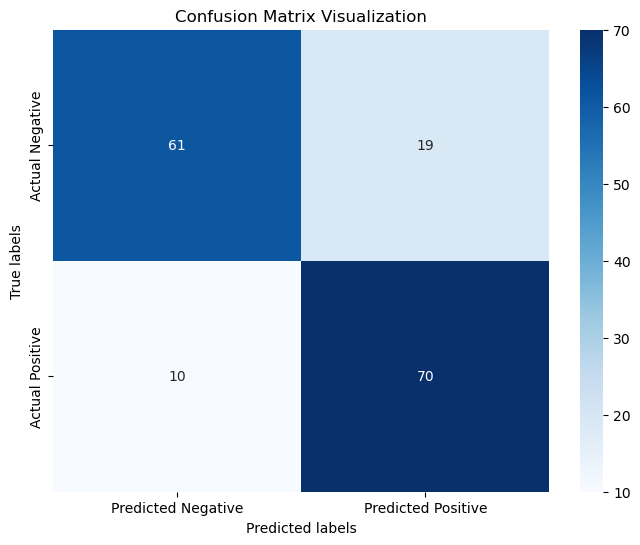

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.79      0.88      0.83        80

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions using the test set and assess model performance
confusion_matrix = metrics.confusion_matrix(ds_test,logistic_ds_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Visualization')
plt.show()
result1 = metrics.classification_report(ds_test,logistic_ds_pred)
print("Classification Report:",)
print (result1)

In [25]:
import numpy as np
# Analyze and interpret logistic regression classifier's strongest term coefficients
voc = vectorizer.vocabulary_
num_features = 10
ds_top_indices = np.argsort(classifier_ds.coef_,axis=1)[:,-num_features:]
da_top_indices = np.argsort(classifier_ds.coef_,axis=1)[:,:num_features]
inv_voc = {v: k for k, v in voc.items()}
ds = 'DS: '
for i in range(num_features):
    ds += inv_voc[ds_top_indices[0,i]]
    if i!=num_features:
        ds+=', '
print(ds)

print(80*'-')
da = 'DA: '
for i in range(num_features):
    da += inv_voc[da_top_indices[0,i]]
    if i!=num_features:
        da+=', '
print(da)

DS: ai, statistics, research, python, product, engineering, scientist, learning, machine, science, 
--------------------------------------------------------------------------------
DA: analytics, travelers, reporting, management, bi, power, google, analyst, excel, guidehouse, 


#### KNN

In [26]:
# Select key features for KNN
ds_top_indices = np.argsort(classifier_ds.coef_,axis=1)[:,-5:]
da_top_indices = np.argsort(classifier_ds.coef_,axis=1)[:,:5]
selected_features = np.concatenate((np.squeeze(ds_top_indices), np.squeeze(da_top_indices)), axis=0).tolist()
selected_vocabs = []
for i in selected_features:
    selected_vocabs.append(inv_voc[i])
print("Original Train Set Shape:\t{}".format(X_train.shape))
new_X_train = X_train[:,selected_features]
new_X_test = X_test[:,selected_features]
print("KNN Train Set Shape:\t\t{}".format(new_X_train.shape))

Original Train Set Shape:	(636, 5000)
KNN Train Set Shape:		(636, 10)


(10, 636)


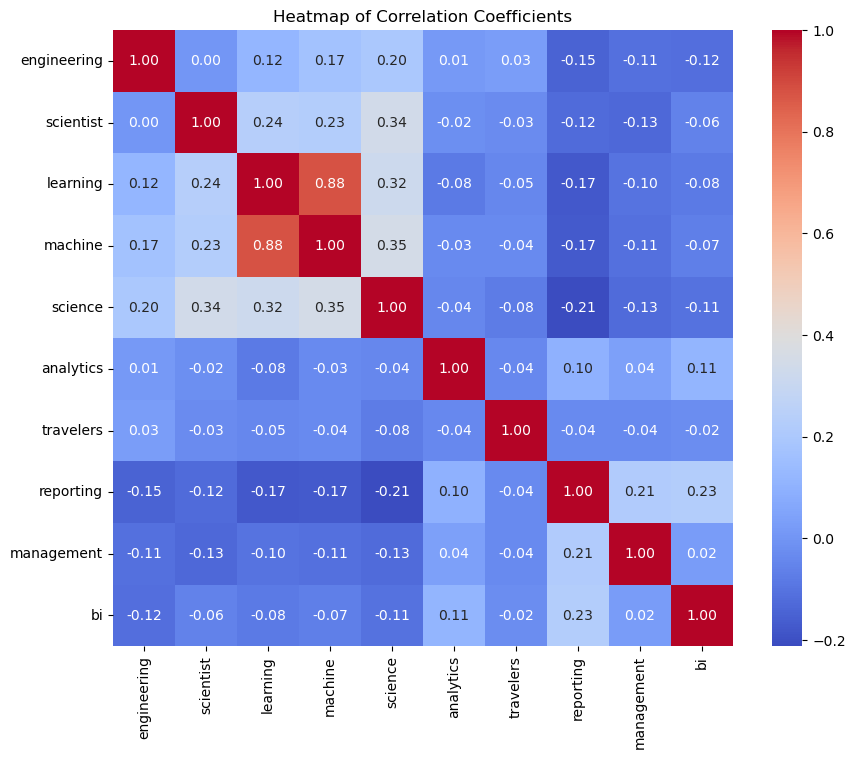

In [27]:
# Use code and/or visuals to demonstrate that none of your selected features are overly correlated with one another 
A = np.transpose(new_X_train.toarray())
print(A.shape)
corr_matrix = np.corrcoef(A)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=selected_vocabs,
            yticklabels=selected_vocabs)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [34]:
# Drop "machine learning" feature
drop_list = [voc['machine']]
print(drop_list)
selected_vocabs = list(set(selected_vocabs) - set(['machine']))
selected_features = list(set(selected_features) - set(drop_list))

[2729]


In [35]:
print("Original Train Set Shape:\t{}".format(X_train.shape))
new_X_train = X_train[:,selected_features]
new_X_test = X_test[:,selected_features]
print("KNN Train Set Shape:\t\t{}".format(new_X_train.shape))

Original Train Set Shape:	(636, 5000)
KNN Train Set Shape:		(636, 9)


(9, 636)


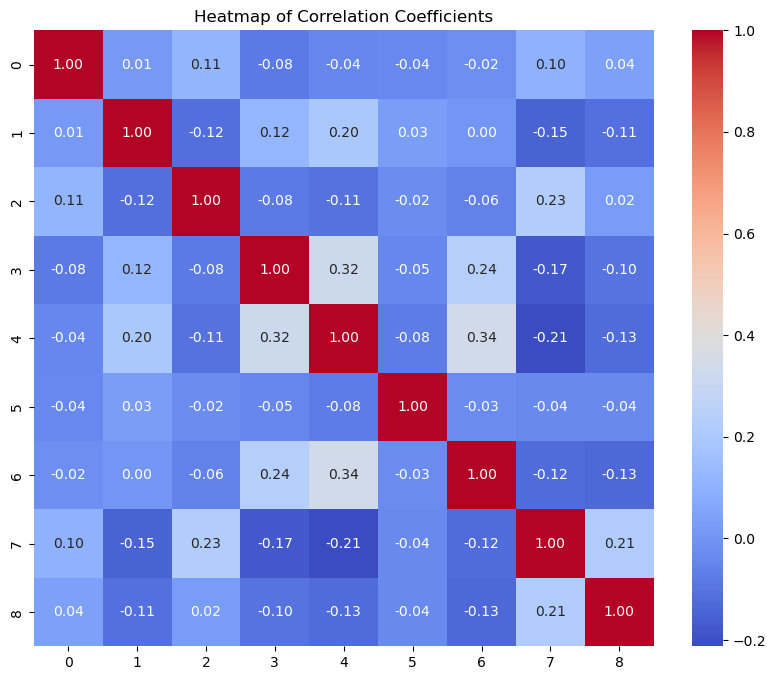

In [36]:
A = np.transpose(new_X_train.toarray())
print(A.shape)
corr_matrix = np.corrcoef(A)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Coefficients')
plt.show()

Confusion Matrix:


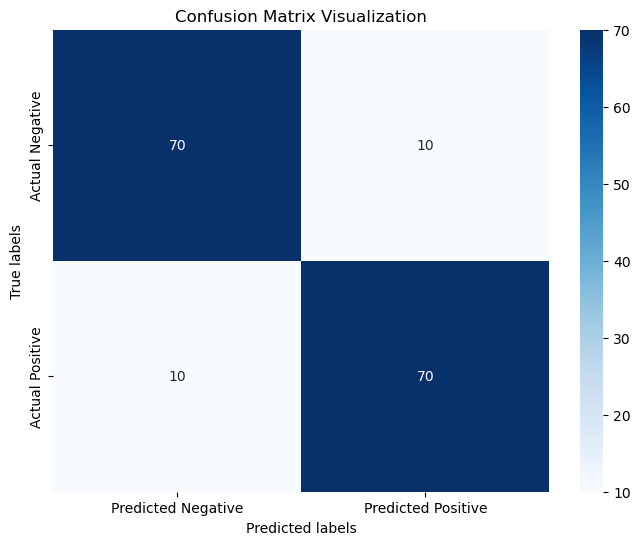

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        80
           1       0.88      0.88      0.88        80

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Train and test a KNN model using the features your team selected
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(new_X_train, ds_train)
knn_ds_pred = classifier.predict(new_X_test)
confusion_matrix = metrics.confusion_matrix(ds_test,knn_ds_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Visualization')
plt.show()
result1 = metrics.classification_report(ds_test,knn_ds_pred)
print("Classification Report:",)
print (result1)

In [41]:
# Use code and/or visuals to demonstrate which variables mattered most to the KNN classifier

knn_df = pd.DataFrame(new_X_train.toarray(), columns = selected_vocabs)
knn_df.describe()


,scientist,engineering,science,analytics,bi,learning,reporting,management,travelers
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,0.032467,0.018191,0.010681,0.021090,0.029503,0.003517,0.009810,0.014489,0.020357
std,0.037550,0.030311,0.031935,0.037432,0.036475,0.037734,0.029867,0.031626,0.027488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.020433,0.000000,0.000000,0.000000,0.018921,0.000000,0.000000,0.000000,0.011360
75%,0.046146,0.025636,0.000000,0.027617,0.042189,0.000000,0.000000,0.018490,0.031363
max,0.214341,0.214767,0.355415,0.355265,0.245400,0.523673,0.292270,0.257542,0.155691


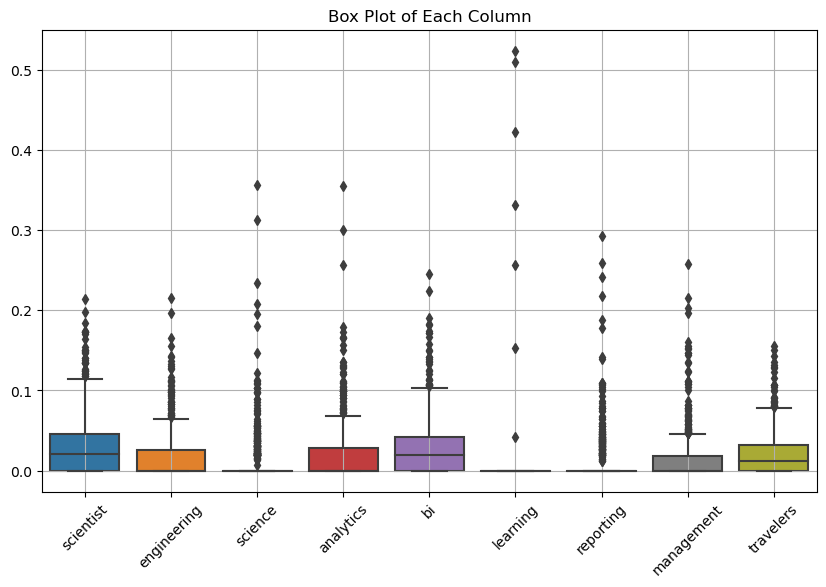

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=knn_df)
plt.xticks(rotation=45)
plt.title('Box Plot of Each Column')
plt.grid(True)
plt.show()

In the context of a KNN classifier, features with wider spreads and more outliers have more influence on the classification as KNN establishes based on the nearest neighbors. Therefore, features `learning`, `bi`, `analytics`, and `scientist` matter most to the KNN classifier. 

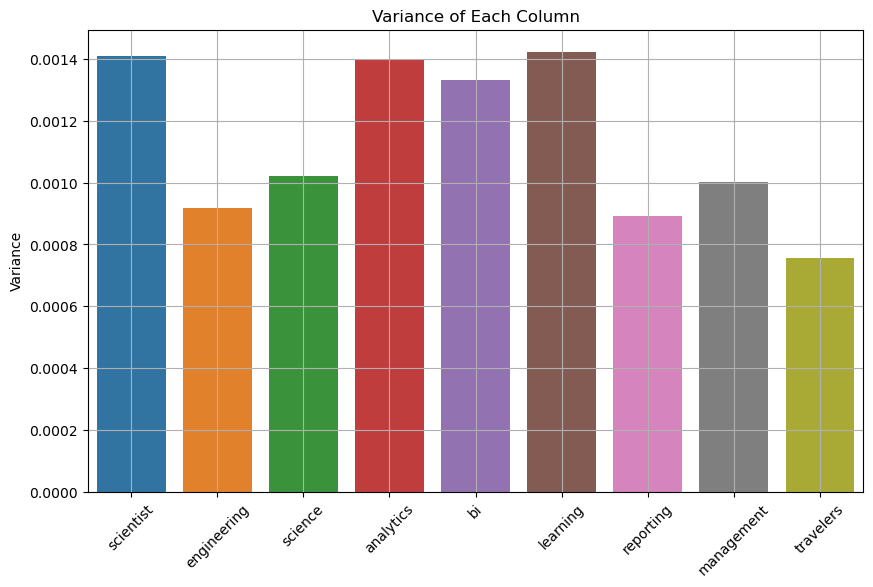

In [43]:
variance = knn_df.var()

plt.figure(figsize=(10, 6))
sns.barplot(x=variance.index, y=variance.values)
plt.xticks(rotation=45)
plt.title('Variance of Each Column')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

## Interpretation

Interpret your output, highlighting the key results and explaining the main takeaways. Make sure you address the following questions:

1. __Performance:__ How would you assess the performance of your models? How do they compare to one another? 

2. __Logistic Regression Coefficients:__ How do you interpret the results of your coefficients output? Which variables are the best predictors of "data analytics" or "data science" advertisements? Why do you think this the case? 

3. __Feature Selection__: Discuss and defend your team's feature selection decisions. Did you need to make additional considerations beyond which terms were the strongest coefficients? If so, what were these considerations? 

4. __Interpreting KNN__: How did you assess which variables mattered most to the KNN classifier? Why is this a challenging task? What spects of the KNN model could not be well explored? 

5. __Model Differences__: How KNN and logistic regression classifiers seem to differ? How do they differ when use for text classification in particular? 

## Conclusion

One or two paragraphs summing up what you've learned. What does this analysis tell us? What are the strengths/limitations of  this data set? What are the strengths/limitations of this method? What is one future direction you could envision for future data analysts or data collectors? Additionally, take a step back and analyze your own use of code. Provide some rationale for choices you've made. Considerations may include performance, human readability, code dependencies, and reproducibility.

## References      

List all works cited and consulted. Use proper APA format. (Note that this assignment does not require outside sources, but all sources you draw upon must be given proper credit.)